In [1]:
import numpy as np
import pandas as pd

In [2]:
import os
import json
import gzip
import pandas as pd
from urllib.request import urlopen

In [3]:
def parse(path):
  g = gzip.open(path, 'r')
  for l in g:
    yield json.loads(l)

In [4]:
import pandas as pd
import gzip
import json

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield json.loads(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

df = getDF('/data/zyang/datasets/amazon_book/Books_5.json.gz')

In [5]:
df.head(2)

,overall,verified,reviewTime,reviewerID,asin,style,reviewerName,reviewText,summary,unixReviewTime,vote,image
0,5.0,False,"03 30, 2005",A1REUF3A1YCPHM,0001713353,{'Format:': ' Hardcover'},TW Ervin II,"The King, the Mice and the Cheese by Nancy Gur...",A story children will love and learn from,1112140800,NaN,NaN
1,5.0,True,"06 20, 2016",AVP0HXC9FG790,0001713353,NaN,Amazon Customer,The kids loved it!,Five Stars,1466380800,NaN,NaN


In [6]:
metadata = []
with gzip.open('/data/zyang/datasets/amazon_book/meta_Books.json.gz') as f:
    for l in f:
        metadata.append(json.loads(l.strip()))
    
# total length of list, this number equals total number of products
print(len(metadata))

# first row of the list
print(metadata[0])

# convert list into pandas dataframe

df_meta = pd.DataFrame.from_dict(metadata)

print(len(df_meta))

2934949
{'category': [], 'tech1': '', 'description': ['It is a biology book with God&apos;s perspective.'], 'fit': '', 'title': 'Biology Gods Living Creation Third Edition 10 (A Beka Book Science Series)', 'also_buy': ['0669009075', 'B000K2P5SA', 'B00MD4G2N0', 'B000ASIPTK', '0130508470', '1892427524', '0321567919', 'B000BJBH20', '0547484631', 'B000HAJTQO', 'B000AUCX7I', '0130365645', 'B000BI1Y2O', '0395976715', '052817729X', '1579246443', 'B001CK63XK', '1591669847', '0395879884', '836585161X', 'B01J2F9BH6', 'B00KYEHR4E', '158008141X', '1857928393', '0927545829', 'B015AR0RA0', 'B000TVHHRE', '0865167990', '1579246052', 'B003NXXVD4', 'B000OH6AX0', '061802087X', 'B000NU2X02', '0743252012'], 'tech2': '', 'brand': 'Keith Graham', 'feature': [], 'rank': '1,349,781 in Books (', 'also_view': ['0019777701', 'B000AUCX7I', 'B000K2P5SA', 'B001CK63XK', 'B01J2F9BH6', 'B000BI1Y2O', '1932012540', 'B0095ZCRCK'], 'main_cat': 'Books', 'similar_item': '', 'date': '', 'price': '$39.94', 'asin': '0000092878'

In [7]:
df3 = df_meta.fillna('')
df4 = df3[df3.title.str.contains('getTime')] # unformatted rows
df5 = df3[~df3.title.str.contains('getTime')] # filter those unformatted rows
print(len(df4))
print(len(df5))

0
2934949


In [8]:
df['overall'].dropna().describe()

count    2.716498e+07
mean     4.374226e+00
std      9.986682e-01
min      0.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: overall, dtype: float64

In [9]:
df.columns

Index(['overall', 'verified', 'reviewTime', 'reviewerID', 'asin', 'style',
       'reviewerName', 'reviewText', 'summary', 'unixReviewTime', 'vote',
       'image'],
      dtype='object')

In [10]:
rating = df[['overall','reviewTime','reviewerID','asin','vote','unixReviewTime']]
rating.head(2) 

,overall,reviewTime,reviewerID,asin,vote,unixReviewTime
0,5.0,"03 30, 2005",A1REUF3A1YCPHM,0001713353,NaN,1112140800
1,5.0,"06 20, 2016",AVP0HXC9FG790,0001713353,NaN,1466380800


In [11]:
rating = rating[['asin','reviewerID','overall','unixReviewTime']]
rating.columns = ['asin','user','rating','timestamp']

In [12]:
df5.columns

Index(['category', 'tech1', 'description', 'fit', 'title', 'also_buy', 'tech2',
       'brand', 'feature', 'rank', 'also_view', 'main_cat', 'similar_item',
       'date', 'price', 'asin', 'imageURL', 'imageURLHighRes', 'details'],
      dtype='object')

In [13]:
meta_data = df5[['asin','category','title','brand','price']]
meta_data.head(2)

,asin,category,title,brand,price
0,0000092878,[],Biology Gods Living Creation Third Edition 10 ...,Keith Graham,$39.94
1,000047715X,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,Acp,


In [14]:
meta_data.shape

(2934949, 5)

In [15]:
meta_data = meta_data.drop_duplicates(subset=['asin'],keep='last')
meta_data.shape

(2930024, 5)

In [16]:
meta_data.head(2)

,asin,category,title,brand,price
0,0000092878,[],Biology Gods Living Creation Third Edition 10 ...,Keith Graham,$39.94
1,000047715X,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,Acp,


In [17]:
data = rating.merge(meta_data,on='asin',how='right')

In [18]:
data.head(2)

,asin,user,rating,timestamp,category,title,brand,price
0,0000092878,NaN,NaN,NaN,[],Biology Gods Living Creation Third Edition 10 ...,Keith Graham,$39.94
1,000047715X,NaN,NaN,NaN,"[Books, New, Used & Rental Textbooks, Medicine...",Mksap 16 Audio Companion: Medical Knowledge Se...,Acp,


In [19]:
data.shape

(29389818, 8)

In [20]:
data = data.dropna()

In [21]:
data.shape

(27163817, 8)

In [22]:
data.head(5)

,asin,user,rating,timestamp,category,title,brand,price
3,0000013765,AYEDW3BFK53XK,5.0,1.325462e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
4,0000013765,A2SUAM1J3GNN3B,5.0,1.252800e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
5,0000013765,A1NGDVXI2BAG7C,5.0,1.407715e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
6,0000013765,AEI062TCE8IGJ,5.0,1.452902e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
7,0000013765,A2GDDTUYPEUIF7,5.0,1.413936e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,


In [23]:
rating_ = data.copy()
rating_.head(2)

,asin,user,rating,timestamp,category,title,brand,price
3,0000013765,AYEDW3BFK53XK,5.0,1.325462e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
4,0000013765,A2SUAM1J3GNN3B,5.0,1.252800e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,


In [24]:
rating_.columns = ['iid','uid','rating','timestamp','category','title','brand','price']
rating_.head(2)

,iid,uid,rating,timestamp,category,title,brand,price
3,0000013765,AYEDW3BFK53XK,5.0,1.325462e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,
4,0000013765,A2SUAM1J3GNN3B,5.0,1.252800e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,


In [25]:
# rating_ = pd.merge(rating,item_info,on='iid',how='inner')

In [26]:
date_min = pd.to_datetime(rating_.timestamp,unit='s').min() 
date_max = pd.to_datetime(rating_.timestamp,unit='s').max()
date_min,date_max

(Timestamp('1996-05-20 00:00:00'), Timestamp('2018-10-02 00:00:00'))

In [27]:
rating_.shape

(27163817, 8)

In [28]:
date_gap = (date_max-date_min)//(19*2)
date_gap

Timedelta('215 days 00:00:00')

In [29]:
rating_['time'] = pd.to_datetime(rating_.timestamp, unit='s').map(lambda x: x.year )

In [30]:
rating_.head(2)

,iid,uid,rating,timestamp,category,title,brand,price,time
3,0000013765,AYEDW3BFK53XK,5.0,1.325462e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,,2012
4,0000013765,A2SUAM1J3GNN3B,5.0,1.252800e+09,"[Books, Arts & Photography, Music]",Heavenly Highway Hymns: Shaped-Note Hymnal,Stamps/Baxter,,2009


In [31]:
# rating_['time'] = rating_['time'] - rating_['time'].min()

In [32]:
import numpy as np
np.sort(rating_.time.unique())

array([1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018])

In [33]:
rating_.uid.unique().shape, rating_.iid.unique().shape,

((1856344,), (704023,))

In [34]:
s_rating = rating_[rating_.time.isin([2017])].copy()
s_rating['time'] = pd.to_datetime(s_rating.timestamp, unit='s').map(lambda x: x.month)
s_rating = s_rating[s_rating.time.isin(range(1,13))]


In [35]:
s_rating.shape

(3933994, 9)

In [36]:
s_rating.groupby('uid').agg({"rating":'count'}).describe()

,rating
count,880147.000000
mean,4.469701
std,10.909923
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,1070.000000


In [37]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})

In [38]:
active_item = item_info[item_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_user = user_info[user_info['rating']>20].index #.sample(frac=10/20,random_state=2023).index
active_item.shape, active_user.shape

((34769,), (23051,))

In [39]:
s_rating = s_rating[s_rating['uid'].isin(active_user)]
s_rating = s_rating[s_rating['iid'].isin(active_item)]
s_rating.shape

(778957, 9)

In [40]:
item_info = s_rating.groupby('iid').agg({"rating":'count'})
user_info = s_rating.groupby('uid').agg({"rating":'count'})
user_info.mean(), item_info.mean()

(rating    33.917835
 dtype: float64,
 rating    22.807865
 dtype: float64)

In [41]:
s_rating.shape, s_rating.uid.unique().shape, s_rating.iid.unique().shape

((778957, 9), (22966,), (34153,))

In [42]:
s_rating.uid.unique().shape, s_rating.iid.unique().shape

((22966,), (34153,))

In [43]:
s_rating = s_rating.reset_index()
s_rating.head(2)

,index,iid,uid,rating,timestamp,category,title,brand,price,time
0,123,0001050230,A2SLME0E0ENFCP,5.0,1.514678e+09,"[Books, Literature & Fiction, Dramas & Plays]",Love's Labour's Lost: Performed by Derek Jacob...,Visit Amazon's William Shakespeare Page,$20.93,12
1,125,0001050230,A2RTH3REZ7YEDB,5.0,1.513642e+09,"[Books, Literature & Fiction, Dramas & Plays]",Love's Labour's Lost: Performed by Derek Jacob...,Visit Amazon's William Shakespeare Page,$20.93,12


<Axes: xlabel='time'>

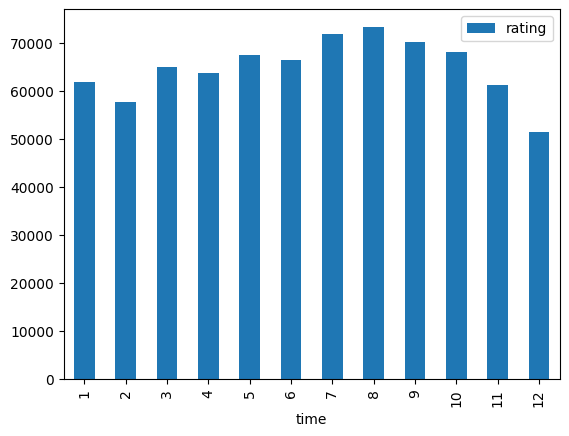

In [44]:
s_rating.groupby('time').agg({'rating':'count'}).reset_index().plot(x='time',kind='bar')

In [45]:
s_rating.rating.unique()

array([5., 4., 3., 2., 1.])

In [46]:
s_rating['label'] = s_rating['rating'].apply(lambda x: 1 if x>=5 else 0)
s_rating['label'].describe()

count    778957.000000
mean          0.633102
std           0.481959
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [47]:
users = s_rating.uid.unique()
items = s_rating.iid.unique()
users_map = dict(zip(users, np.arange(users.shape[0])+1))
items_map = dict(zip(items, np.arange(items.shape[0])+1))
# users_map[0]=0
# items_map[0]=0
s_rating['uid'] = s_rating['uid'].map(users_map)
s_rating['iid'] = s_rating['iid'].map(items_map)
s_rating.uid.max(), s_rating.iid.max()

(22966, 34153)

In [48]:
rating_train = s_rating[s_rating.time.isin(range(1,12))].copy()
rating_valid_test = s_rating[s_rating.time.isin([12])].copy()
rating_valid_test.sort_values(by="timestamp",inplace=True)
N_ = rating_valid_test.shape[0]//2
# rating_p = rating_valid_test.iloc[0:N_].copy()
# rating_train = pd.concat([rating_train, rating_p],axis=0)
rating_valid = rating_valid_test.iloc[:N_].copy()
rating_test = rating_valid_test.iloc[N_:].copy()
rating_train.shape, rating_valid.shape, rating_test.shape

((727463, 11), (25747, 11), (25747, 11))

In [49]:
rating_valid_test.timestamp.values[0:5].argsort()

array([0, 1, 2, 3, 4])

In [50]:
rating_train.time.unique(),rating_valid.time.unique()

(array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1]), array([12]))

In [51]:
s_rating[s_rating.time.isin(range(7,13))].groupby('iid').agg({"rating":'count'}).mean()

rating    12.623846
dtype: float64

In [52]:
train_user = rating_train['uid'].unique()
train_item = rating_train['iid'].unique()
rating_valid['not_cold'] = rating_valid[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
rating_test['not_cold'] = rating_test[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [53]:
rating_valid['not_cold'].describe(), rating_test['not_cold'].describe()

(count    25747.000000
 mean         0.707539
 std          0.454902
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    25747.000000
 mean         0.677322
 std          0.467510
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [54]:
rating_train.shape, rating_valid.shape, rating_test.shape

((727463, 11), (25747, 12), (25747, 12))

In [55]:
rating_train.groupby("uid").agg({'label':['count','sum']}).describe(), rating_train.groupby("iid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  22854.000000  22854.000000
 mean      31.830883     20.171042
 std       34.845966     25.668595
 min        1.000000      0.000000
 25%       15.000000      7.000000
 50%       22.000000     14.000000
 75%       36.000000     24.000000
 max      865.000000    851.000000,
               label              
               count           sum
 count  33713.000000  33713.000000
 mean      21.578115     13.673924
 std       33.510363     23.416971
 min        1.000000      0.000000
 25%        5.000000      3.000000
 50%       12.000000      7.000000
 75%       24.000000     14.000000
 max     1060.000000    464.000000)

In [56]:
# rating_valid.groupby("uid").agg({'label':['count','sum']}).describe()
rating_test.groupby("uid").agg({'label':['count','sum']}).describe(), rating_test.groupby("iid").agg({'label':['count','sum']}).describe()
# rating_valid_test.groupby("uid").agg({'label':['count','sum']}).describe()

(              label              
               count           sum
 count  10207.000000  10207.000000
 mean       2.522485      1.565004
 std        2.684147      2.017672
 min        1.000000      0.000000
 25%        1.000000      0.000000
 50%        2.000000      1.000000
 75%        3.000000      2.000000
 max       78.000000     36.000000,
              label             
              count          sum
 count  9997.000000  9997.000000
 mean      2.575473     1.597879
 std       8.157588     5.848883
 min       1.000000     0.000000
 25%       1.000000     0.000000
 50%       1.000000     1.000000
 75%       2.000000     1.000000
 max     305.000000   202.000000)

In [57]:
# train_slot = list(range(26,36))
# valid_slot = list(range(36,37))
# test_slot = list(range(37,38))
# rating_  = rating_all[rating_all['time'].isin(list(range(26,38)))].copy().reset_index()
# train_slot = list(range(2010,2017))
# valid_slot = list(range(34,36))
# test_slot = list(range(36,38))
# rating_  = rating_all[rating_all['time'].isin(list(range(24,38)))].copy().reset_index()

In [58]:
# rating_['rating'].unique()

In [59]:
# rating_['label'] = rating_['rating'].apply(lambda x: 1 if x>4 else 0)
# rating_.head(5)

In [60]:
# rating_.label.describe()

In [61]:
# rating_.uid.min(), rating_.uid.max(), rating_.iid.min(),rating_.iid.max()

In [62]:
# rating_.describe()

In [63]:
# rating_.shape[0]/(rating_.uid.max()*rating_.iid.max())

## split by time order

In [64]:
# rating_train = rating_[rating_['time'].isin(train_slot)].copy()
# rating_valid = rating_[rating_['time'].isin(valid_slot)].copy()
# rating_test = rating_[rating_['time'].isin(test_slot)].copy()

In [65]:
rating_train.shape, rating_valid.shape, rating_test.shape

((727463, 11), (25747, 12), (25747, 12))

In [66]:
rating_valid_f = rating_valid
rating_test_f = rating_test

In [67]:
def filter_cold_start(train,valid,test):
    train_user = train.uid.unique()
    train_item = train.iid.unique()
    valid = valid[valid['uid'].isin(train_user)]
    test = test[test['uid'].isin(train_user)]
    valid = valid[valid['iid'].isin(train_item)]
    test = test[test['iid'].isin(train_item)]
    return valid, test

In [68]:
# rating_valid_f, rating_test_f = filter_cold_start(rating_train,rating_valid,rating_test)
# rating_valid_f.shape, rating_test_f.shape

In [69]:
rating_train.label.mean(), rating_valid.label.mean(), rating_test.label.mean()

(0.6336940847850681, 0.6290441604847167, 0.6204217967141803)

In [70]:
rating_valid_f.label.mean(), rating_test_f.label.mean() 

(0.6290441604847167, 0.6204217967141803)

In [71]:
rating_valid_f.columns

Index(['index', 'iid', 'uid', 'rating', 'timestamp', 'category', 'title',
       'brand', 'price', 'time', 'label', 'not_cold'],
      dtype='object')

In [72]:
import copy
def deal_with_each_u(x,u):
    items = np.array(x.iid)
    labels = np.array(x.label)
    titles = np.array(x.title)
    timestamp = np.array(x.timestamp)
    flags =  np.array(x.flag) 
    his = [0] # adding a '0' by default
    his_title = ['']
    results = []
    for i in range(items.shape[0]):
        results.append((u, items[i], timestamp[i], np.array(his), copy.copy(his_title),titles[i], labels[i], flags[i]))
        # training data
        if labels[i] > 0: # positive 
            his.append(items[i])
            his_title.append(titles[i])
    return results

In [73]:
rating_train = rating_train.copy()

In [74]:
rating_train['flag'] =  pd.DataFrame(np.ones(rating_train.shape[0])*-1, index=rating_train.index)
rating_valid_f['flag'] = pd.DataFrame(np.zeros(rating_valid_f.shape[0]), index=rating_valid_f.index)
rating_test_f['flag'] = pd.DataFrame(np.ones(rating_test_f.shape[0]), index=rating_test_f.index)
data_ = pd.concat([rating_train, rating_valid_f, rating_test_f],axis=0,ignore_index=True)
data_ = data_.sort_values(by=['uid','timestamp'])
u_inter_all = data_.groupby('uid').agg({'iid':list, 'label':list, 'title':list, 'timestamp':list,'flag':list})


In [75]:
data_.flag.unique()

array([-1.,  0.,  1.])

In [76]:
results = []
for u in u_inter_all.index:
    results.extend(deal_with_each_u(u_inter_all.loc[u],u))

In [77]:
u_, i_, time_, label_, his_, his_title, title_,flag_ = [],[],[],[],[],[],[],[]
for re_ in results:
    u_.append(re_[0])
    i_.append(re_[1])
    time_.append(re_[2])
    his_.append(re_[3])
    his_title.append(re_[4])
    title_.append(re_[5])
    label_.append(re_[6])
    flag_.append(re_[7])

In [78]:
data_ = pd.DataFrame({"uid":u_,'iid':i_,'label':label_, 'timestamp': time_ , 'his':his_,'his_title':his_title,'title':title_, 'flag': flag_})


In [79]:
data_.head(2)

,uid,iid,label,timestamp,his,his_title,title,flag
0,1,3054,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0
1,1,1985,0,1.484525e+09,"[0, 3054]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0


In [80]:
data_.label.describe()

count    778957.000000
mean          0.633102
std           0.481959
min           0.000000
25%           0.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: label, dtype: float64

In [81]:
data_.tail(5)

,uid,iid,label,timestamp,his,his_title,title,flag
778952,22964,33545,1,1.510790e+09,"[0, 33545, 33545, 33545, 33545, 33545, 33545, ...","[, Garth Brooks The Anthology: The First Five ...",Garth Brooks The Anthology: The First Five Years,-1.0
778953,22964,33545,1,1.510790e+09,"[0, 33545, 33545, 33545, 33545, 33545, 33545, ...","[, Garth Brooks The Anthology: The First Five ...",Garth Brooks The Anthology: The First Five Years,-1.0
778954,22964,33545,1,1.510790e+09,"[0, 33545, 33545, 33545, 33545, 33545, 33545, ...","[, Garth Brooks The Anthology: The First Five ...",Garth Brooks The Anthology: The First Five Years,-1.0
778955,22965,33724,1,1.502237e+09,[0],[],The Day Of The Jackal,-1.0
778956,22966,33875,1,1.508803e+09,[0],[],The Angel Experiment: A Maximum Ride Novel,-1.0


In [82]:
train_ = data_[data_['flag'].isin([-1])].copy()
valid_ = data_[data_['flag'].isin([0])].copy()
test_ = data_[data_['flag'].isin([1])].copy()
train_.shape,valid_.shape,test_.shape

((727463, 8), (25747, 8), (25747, 8))

In [83]:
train_user = train_['uid'].unique()
train_item = train_['iid'].unique()
valid_['not_cold'] = valid_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")
test_['not_cold'] = test_[['uid','iid']].apply(lambda x: x.uid in train_user and x.iid in train_item, axis=1).astype("int")

In [84]:
valid_['not_cold'].describe(), test_['not_cold'].describe()

(count    25747.000000
 mean         0.707539
 std          0.454902
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64,
 count    25747.000000
 mean         0.677322
 std          0.467510
 min          0.000000
 25%          0.000000
 50%          1.000000
 75%          1.000000
 max          1.000000
 Name: not_cold, dtype: float64)

In [85]:
train_['not_cold'] = pd.DataFrame(np.ones(train_.shape[0]),index=train_.index).astype("int")
train_.head(2)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,3054,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,1985,0,1.484525e+09,"[0, 3054]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1


In [86]:
save_path = "/data/zyang/datasets/amazon_book_new/"
train_.to_pickle(save_path+"train_ood2.pkl")
valid_.to_pickle(save_path+"valid_ood2.pkl")
test_.to_pickle(save_path+"test_ood2.pkl")

In [87]:
train_.head(2)

,uid,iid,label,timestamp,his,his_title,title,flag,not_cold
0,1,3054,1,1.483920e+09,[0],[],ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by L...,-1.0,1
1,1,1985,0,1.484525e+09,"[0, 3054]","[, ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE b...",Norwegian Wood,-1.0,1


In [88]:
train_.title.iloc[0]

"ENDURANCE: SHACKLETON'S INCREDIBLE VOYAGE by Lansing, Alfred ( Author ) on Apr-24-1999[ Paperback ]"

In [89]:
valid_.shape

(25747, 9)

In [90]:
valid_small = valid_.sample(frac=0.25,random_state=2023)
valid_small.to_pickle(save_path+"valid_small_ood2.pkl")

In [91]:
valid_small.shape

(6437, 9)

In [92]:
# valid_small.shape

In [93]:
train_['his'].apply(len).describe()

count    727463.000000
mean         22.816884
std          39.927104
min           1.000000
25%           5.000000
50%          11.000000
75%          25.000000
max         851.000000
Name: his, dtype: float64

In [94]:
train_.label.mean(), test_.label.mean(), valid_.label.mean()  

(0.6336940847850681, 0.6204217967141803, 0.6290441604847167)

In [95]:
test_.groupby("uid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  10207.000000  10207.000000
mean       2.522485      1.565004
std        2.684147      2.017672
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      2.000000
max       78.000000     36.000000

In [96]:
train_.groupby("iid").agg({"label":['count','sum']}).describe()

label              
              count           sum
count  33713.000000  33713.000000
mean      21.578115     13.673924
std       33.510363     23.416971
min        1.000000      0.000000
25%        5.000000      3.000000
50%       12.000000      7.000000
75%       24.000000     14.000000
max     1060.000000    464.000000

In [97]:
valid_[valid_['uid'].isin(train_['uid'].unique())].uid.unique().shape

(10217,)

In [98]:
train_['iid'].unique()

array([ 3054,  1985, 24657, ..., 33983, 27284, 27395])

In [99]:
valid_[valid_['iid'].isin(train_['iid'].unique())].iid.unique().shape

(8464,)

In [100]:
valid_.iid.unique().shape, test_.iid.unique().shape

((8749,), (9997,))

In [101]:
valid_.uid.unique().shape, test_.uid.unique().shape

((10270,), (10207,))

In [102]:
train_.uid.unique().shape, train_.iid.unique().shape

((22854,), (33713,))

In [103]:

np.setdiff1d(test_.uid.unique(),train_.uid.unique()).shape, np.setdiff1d(valid_.uid.unique(),train_.uid.unique()).shape

((66,), (53,))

In [104]:
np.setdiff1d(test_.iid.unique(),train_.iid.unique()).shape, np.setdiff1d(valid_.iid.unique(),train_.iid.unique()).shape

((392,), (285,))

In [105]:
# m = train_.groupby('uid').agg({'label':'count'}).sort_values('label').reset_index()
# m.plot(x='uid',kind='bar')

In [106]:
# train_.uid.max()



In [107]:
# save_path = "/data/zyang/datasets/ml-1m/"
# train_ = pd.read_pickle(save_path+"train_ood2.pkl")
# valid_ = pd.read_pickle(save_path+"valid_ood2.pkl")
# test_ = pd.read_pickle(save_path+"test_ood2.pkl")

In [108]:
max(train_.uid.max(),test_.uid.max(),valid_.uid.max())+1, max(train_.iid.max(),test_.iid.max(),valid_.iid.max())+1


(22967, 34154)

In [109]:
# valid_small = pd.read_pickle(save_path+"valid_small_ood2.pkl")

In [110]:
# valid_small.uid.max(), valid_small.iid.max()

In [111]:
import pandas as pd

In [112]:
# save_path = "/data/zyang/datasets/amazon/"
# train = pd.read_pickle(save_path+"train_ood2.pkl")
# valid = pd.read_pickle(save_path+"valid_ood2.pkl")
# test = pd.read_pickle(save_path+"test_ood2.pkl")

In [113]:
valid_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10270.000000  10270.000000
mean       2.507011      0.630202
std        2.584496      0.422755
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      0.937255
75%        3.000000      1.000000
max       45.000000      1.000000

In [114]:
test_.groupby("uid").agg({"label":['count','mean']}).describe()

label              
              count          mean
count  10207.000000  10207.000000
mean       2.522485      0.631107
std        2.684147      0.424097
min        1.000000      0.000000
25%        1.000000      0.000000
50%        2.000000      1.000000
75%        3.000000      1.000000
max       78.000000      1.000000

## read info

In [5]:
import pandas as pd
save_path = "/data/zyang/datasets/amazon_book_new/"
train_ = pd.read_pickle(save_path+"train_ood2.pkl")
valid_ = pd.read_pickle(save_path+"valid_ood2.pkl")
test_ = pd.read_pickle(save_path+"test_ood2.pkl")
data = pd.concat([train_,valid_,test_],axis=0)

In [6]:
data.groupby("uid").agg({"label":['sum','count']}).describe()

label              
                sum         count
count  22966.000000  22966.000000
mean      21.473439     33.917835
std       27.302854     37.038077
min        0.000000      1.000000
25%        7.000000     16.000000
50%       15.000000     23.000000
75%       26.000000     39.000000
max      905.000000    919.000000